## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

## Importing dataset

In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Printing a basic summary of dataset given to us

In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Checking empty values

Checking if there are any empty values in the entire dataset

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Replacing empty values with mean

In [ ]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data pre-processing

Splitting dataset into dependent and independent variables

In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

We are using OneHotEncoder() to encode the categorical columns: 'gender', 'work_type' and 'smoking_status'.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[0.0 1.0 0.0 ... 'Urban' 228.69 36.6]
 [1.0 0.0 0.0 ... 'Rural' 202.21 28.893236911794673]
 [0.0 1.0 0.0 ... 'Rural' 105.92 32.5]
 ...
 [1.0 0.0 0.0 ... 'Rural' 82.99 30.6]
 [0.0 1.0 0.0 ... 'Rural' 166.29 25.6]
 [1.0 0.0 0.0 ... 'Urban' 85.28 26.2]]


We are using LabelEncoder() to encode binary columns: 'ever_married' and 'residence_type'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [ ]:
print(x)

[[0.0 1.0 0.0 ... 1 228.69 36.6]
 [1.0 0.0 0.0 ... 0 202.21 28.893236911794673]
 [0.0 1.0 0.0 ... 0 105.92 32.5]
 ...
 [1.0 0.0 0.0 ... 0 82.99 30.6]
 [0.0 1.0 0.0 ... 0 166.29 25.6]
 [1.0 0.0 0.0 ... 1 85.28 26.2]]


## Splitting dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

Checking dimensions of test set and training set:

In [ ]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


## Feature scaling

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Handling imbalance data using SMOTE

SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Applying logistic regression on our dataset

Importing necessary libraries for Logistic regression and evaluating metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

Applying logistic regression to our model

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calculating metrics for our test set

In [ ]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = LogisticRegression(random_state=0), X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

Printing out metrics

Logistic Regression metrics:

Confusion Matrix:
 [[750 218]
 [ 15  39]]

Accuracy Score:  0.7720156555772995

K-Fold Validation Mean Accuracy: 79.45 %

Standard Deviation: 1.39 %

ROC AUC Score: 0.75

Precision: 0.15

Recall: 0.72

F1: 0.25
-----------------------------------



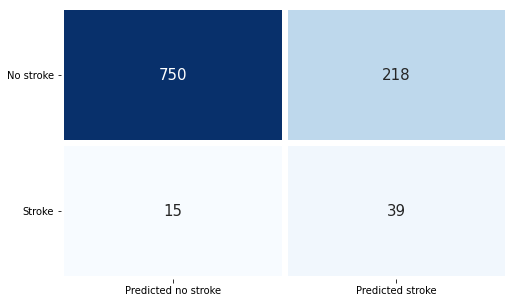

In [ ]:
# Printing metrics
print('Logistic Regression metrics:')
print('')
print('Confusion Matrix:\n',cm)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('-----------------------------------')
print('')
#Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## Advanced Tuning Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

The GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
j=[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=j,scoring='accuracy',cv=10)
grid.fit(x_train_res, y_train_res)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format('Logistic Regression',best_accuracy*100))
print('Best Parameters : ',best_param)

Logistic Regression:
Best Accuracy : 79.45%
Best Parameters :  {'C': 0.75, 'random_state': 0}


## Interesting Insights and visualizations from dataset

### Some key observations from our dataset

Gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


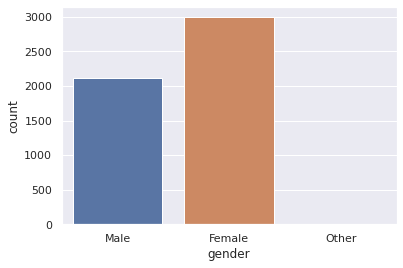

In [ ]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

Age & BMI

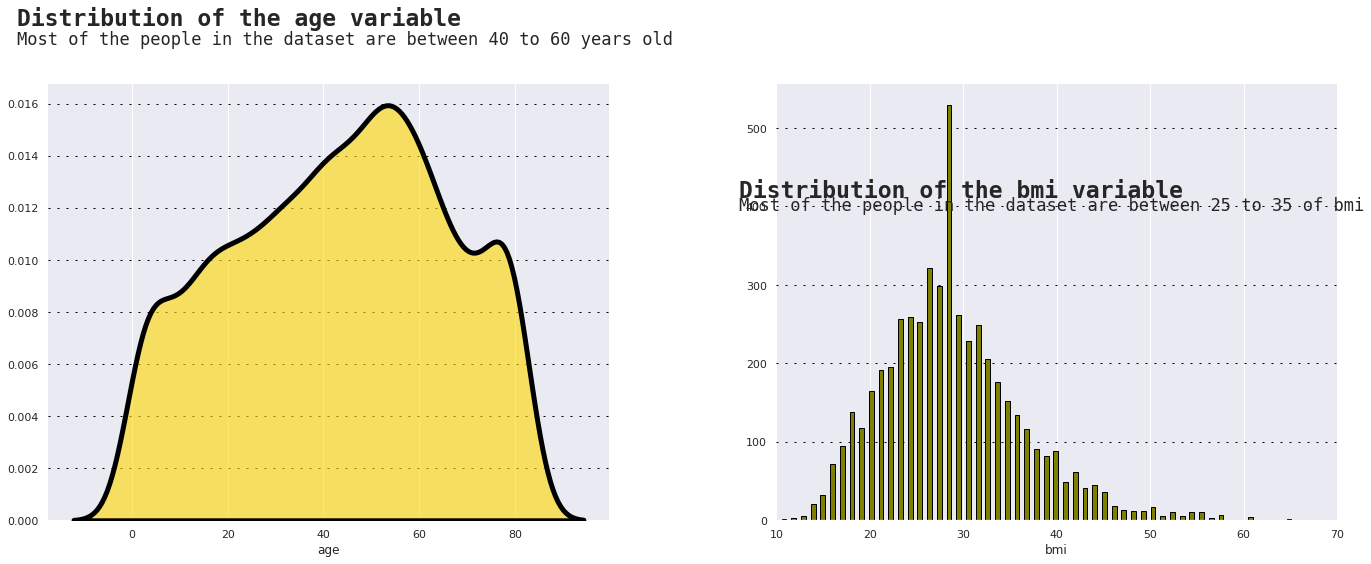

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,2)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-24,0.019,'Distribution of the age variable',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-24,0.01826,'Most of the people in the dataset are between 40 to 60 years old',fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(6,412,'Distribution of the bmi variable',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[1].text(6,395,'Most of the people in the dataset are between 25 to 35 of bmi',fontsize=17,fontweight='light', fontfamily='monospace')

sns.kdeplot(x=dataset['age'],ax=ax[0],shade=True, color='gold', alpha=0.6,zorder=3,linewidth=5,edgecolor='black')
sns.histplot(x=dataset['bmi'],ax=ax[1], color='olive', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
ax[1].set_xlim(10,70)
        
plt.tight_layout()



Hypertension

0    4612
1     498
Name: hypertension, dtype: int64


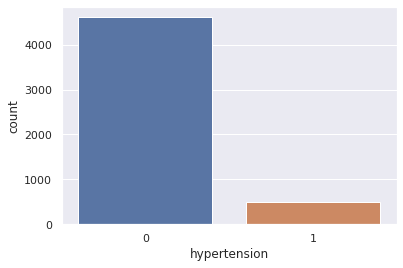

In [ ]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

Marital status

Yes    3353
No     1757
Name: ever_married, dtype: int64


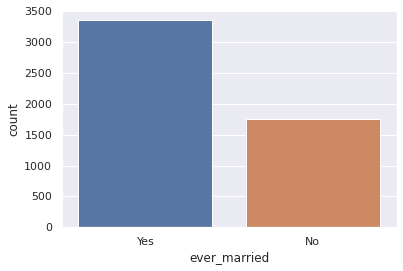

In [ ]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

Type of work 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


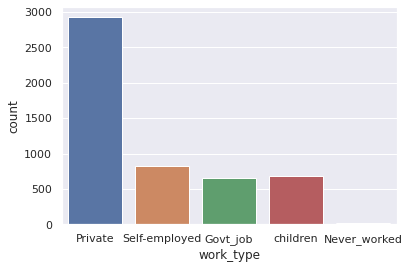

In [ ]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

Type of residence

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


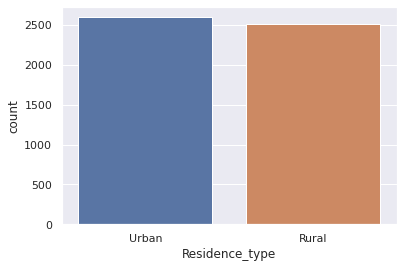

In [ ]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

Smoking Status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


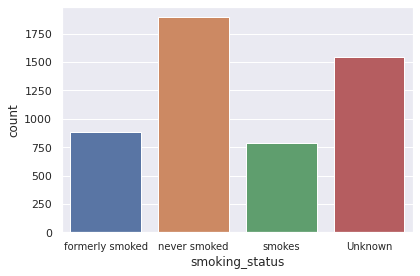

In [ ]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

Stroke experienced?

0    4861
1     249
Name: stroke, dtype: int64


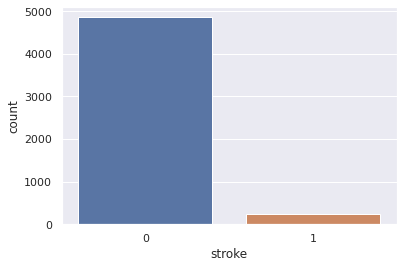

In [ ]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()